# # Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction 

In [1]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)


[0.96666667 1.         0.86666667 0.86666667 1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [2]:
from sklearn import neighbors
n_neighbors = 11
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.93333333 1.         1.         0.96666667 1.        ]


In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [3]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)

print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print(scores2)

Classification score of k-nn with distance weighting
[0.96666667 1.         1.         0.96666667 1.        ]


The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).



best k=7
best accuracy=0.9666666666666667


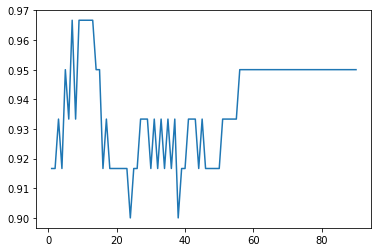

In [4]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy=0
best_k=1
A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train)
    index=n_neighbors-1
    A[index]=clf_knn3.score(X_test, y_test)
    if best_accuracy<clf_knn3.score(X_test, y_test):
        best_accuracy=clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
    
print("\n")
print("best k="+str(best_k))
print("best accuracy="+str(best_accuracy))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))

plt.plot(np.arange(1,len(y_train)+1),A)

plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

weighting:uniform
weighting:distance


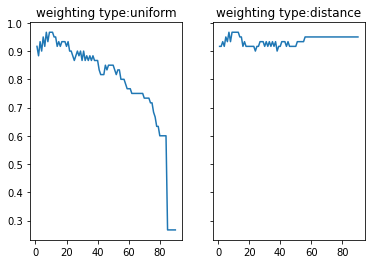

In [5]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()


In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)


 weighting:uniform

 weighting:distance


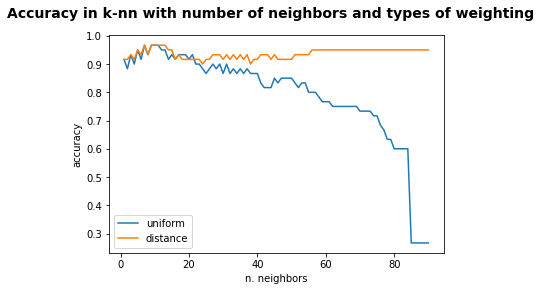

In [6]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\n weighting:"+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
    
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')  
plt.show()


Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, Green for Virginica.

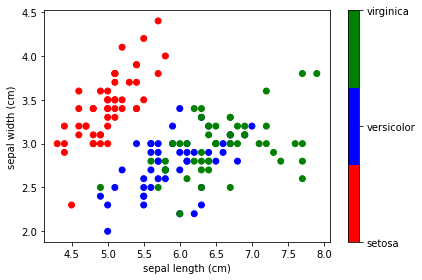

In [7]:
import matplotlib.colors as cl
# Indici delle feature selezionate per fare il plot
x_index = 0
y_index = 1

# Index 0 = setosa, index 1 = versicolor, index 2 = virginica
colors = ['red','blue','green']

# Formatter per dividere la barra con i colori corretti per ciascuna classe
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target, cmap=cl.ListedColormap(colors))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation


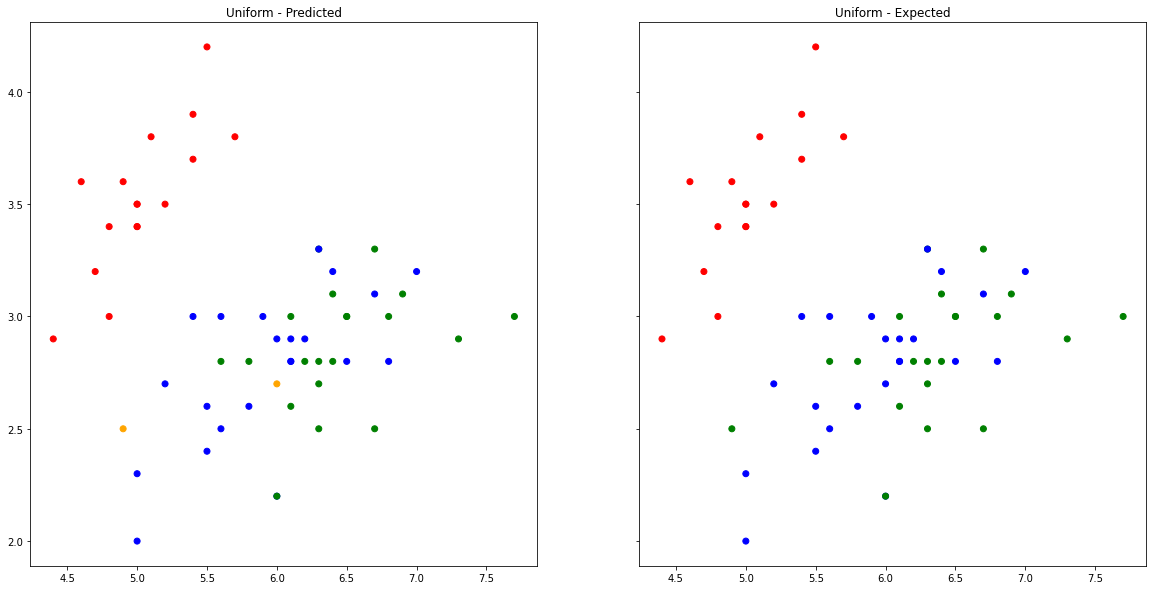

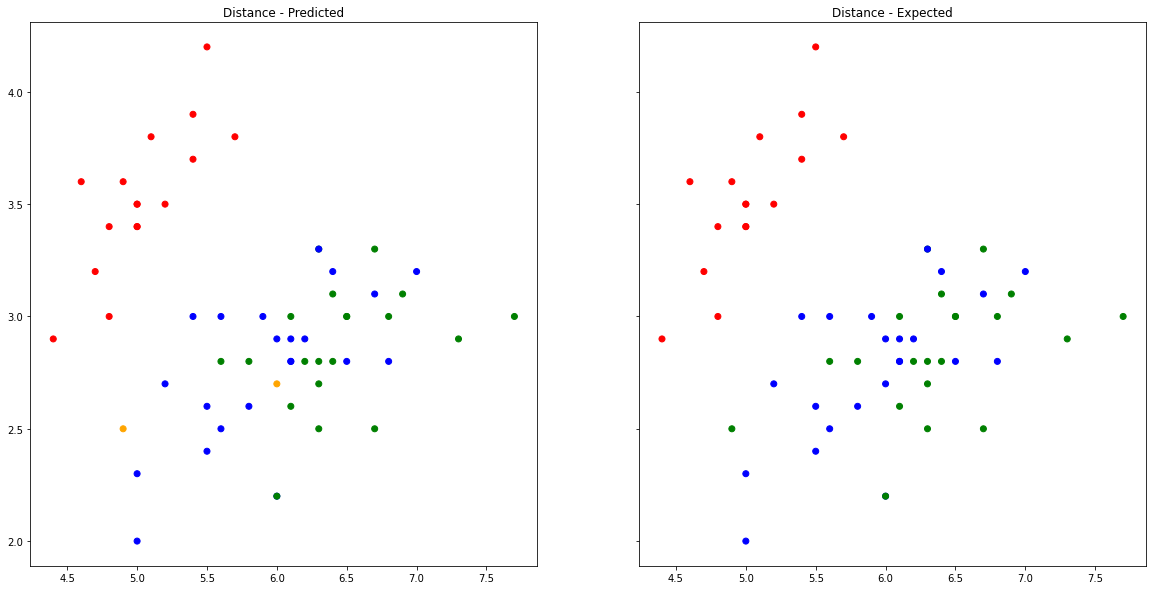

In [8]:
# Effettuo una nuova prediction basandomi sul miglior knn calcolato precedentemente (knn=7)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
clf_knn = neighbors.KNeighborsClassifier(n_neighbors = 7, weights='uniform')
clf_knn.fit(X_train, y_train)
prediction = clf_knn.predict(X_test)
scores = cross_val_score(clf_knn, X_train, y_train, cv=5,scoring='accuracy')

# Ripeto la prediction cambiano il weight_type
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors = 7, weights='distance')
clf_knn2.fit(X_train, y_train)
prediction2 = clf_knn2.predict(X_test)
scores2 = cross_val_score(clf_knn2, X_train, y_train, cv=5,scoring='accuracy')

colors2 = [0]*len(y_test)
for i in range(len(y_test)):
    if y_test[i]==0:
        colors2[i]='r'
    elif y_test[i]==1:
        colors2[i]='b'
    else:
        colors2[i]='g'
        
colors1 = [0]*len(prediction)
for i in range(len(prediction)):
    if prediction[i]==y_test[i] and prediction[i]==0:
        colors1[i]='r'
    elif prediction[i]==y_test[i] and prediction[i]==1:
        colors1[i] = 'b'
    elif prediction[i]==y_test[i] and prediction[i]==2:
        colors1[i] = 'g'
    else:
        colors1[i]='orange'
        
f, axarr = plt.subplots(1, 2, sharey=True,figsize=(20,10))

# Predicted - Uniform
axarr[0].set_title('Uniform - Predicted')
axarr[0].scatter(X_test[:,0], X_test[:,1], c=colors1)

# Expected - Uniform
axarr[1].set_title('Uniform - Expected')
axarr[1].scatter(X_test[:,0], X_test[:,1], c=colors2)

f, axarr = plt.subplots(1, 2, sharey=True,figsize=(20,10))

# Predicted - Distance
axarr[0].set_title('Distance - Predicted')
axarr[0].scatter(X_test[:,0], X_test[:,1], c=colors1)

# Expected - Distance
axarr[1].set_title('Distance - Expected')
axarr[1].scatter(X_test[:,0], X_test[:,1], c=colors2)

In the following, extend the above exercize on k-nn using a kernel function  
K(x,y) for the distances computation, such that distance(x,y)=1-K(x,y).    Use a Gaussian-like (or Radial Basis Function) kernel K(x,y)=exp(-gamma(x-y)^2), with gamma the inverse of the sigma squared variance, that must be tuned to the best value according to the accuracy reached by the k-nn, with k=7 (similarly as done with the previous example on tuning the parameter n_neightbors).

Best Sigma=0.559908256880734
Best Accuracy=0.9666666666666667
Accuracy: 0.9666666666666667


Text(0, 0.5, 'Petals width')

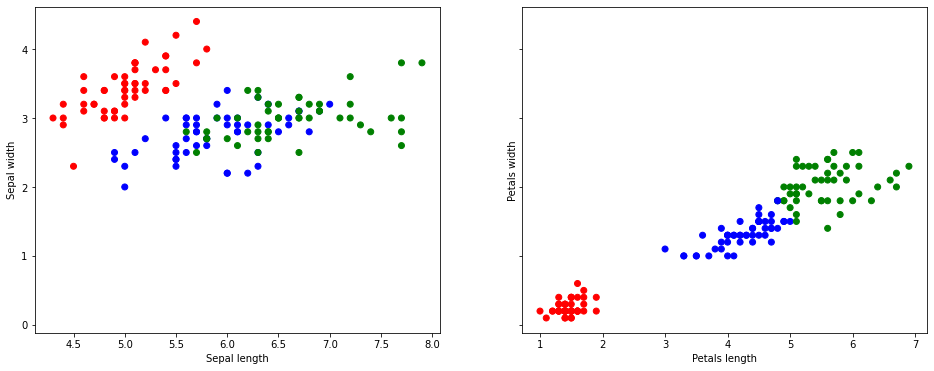

In [9]:
def gaussian(sigma):
    def distance(dist):
        arg = -(dist/(2*(sigma**2)))
        gauss = np.exp(arg)
        return gauss
    return distance

# Immaginando la funzione come una gaussiana, la gamma moltiplica 
# la distanza al quadrato che intercorre tra il centro
# della gaussiana e un qualsiasi altro punto. 
best_sigma = 0
# Radddoppiando la gamma raddoppio la scala e
# allargo la sfera di influenza di x rispetto ai punti y
best_accuracy = 0
# Ripeto quanto fatto nell'esercizio precedente ma tengo conto anche del parametro sigma
# prendendo il suo massimo nel momento in cui raggiunge la best accuracy
for s in np.linspace(0.01, 10, 110): # Procedo a intervalli
    clf = neighbors.KNeighborsClassifier(n_neighbors = 7, weights=gaussian(s))
    clf.fit(X_train, y_train)
    if best_accuracy<clf.score(X_test, y_test):
        best_accuracy=clf.score(X_test, y_test)
        best_sigma=s
        
print("Best Sigma="+str(best_sigma))
print("Best Accuracy="+str(best_accuracy))

clf_g = neighbors.KNeighborsClassifier(90, weights=gaussian(best_sigma))
clf_g.fit(iris.data, iris.target)
print("Accuracy: {}".format(clf_g.score(iris.data, iris.target)))

color = ['red' if t == 0 else 'blue' if t == 1 else 'green' for t in clf_g.predict(iris.data)]
sepal = iris.data[:,0:2]
petals = iris.data[:,2:4]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figheight(6)
f.set_figwidth(16)

ax1.scatter(sepal[:,0], sepal[:,1], c=color)
ax1.set_xlabel("Sepal length")
ax1.set_ylabel("Sepal width")

ax2.scatter(petals[:,0], petals[:,1], c=color)
ax2.set_xlabel("Petals length")
ax2.set_ylabel("Petals width")